In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<h1 style="font-family: 'Poppins', sans-serif; color: #0061a8; font-size: 36px; text-align: center;">Titanic Disaster Analysis</h1>

<img src= "https://s26162.pcdn.co/wp-content/uploads/sites/3/2021/02/titanic-feat1.jpg" alt ="Titanic" style="height: 300px; width:auto; border-radius: 10px; align: center;">

<p style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 600; text-align: center;">After a lot of feature engineering and fine tuning of several models I made it to the Top 13%. Please do leave an upvote if you find this notebook helpful!</p>

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; color: #5eaaa8">Content</h3>
<ol style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li><a href="#section1">Introduction</a></li>
    <li><a href="#section2">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#subsection1">Training Data</a></li>
        <li><a href="#subsection2">Test Data</a></li>
    </ul>
    <li><a href="#section3">Data Preprocessing and Cleaning</a></li>
    <ul>
        <li><a href="#subsection3">Handling Missing Values</a></li>
        <li><a href="#subsection4">Removing Irrelevant Columns</a></li>
        <li><a href="#subsection5">Skewness of Fare Column</a></li>
        <li><a href="#subsection6">Binning of Age Column</a></li>
        <li><a href="#subsection7">Creating different columns for Family Names and Titles</a></li>
    </ul>
    <li><a href="#section4">Encoding Categorical Columns</a></li>
    <li><a href="#section5">Classification Models</a></li>
    <li><a href="#section6">Result</a></li>
</ol>

<a id="section1"></a>
<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; color: #5eaaa8">Introduction</h3>
<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">Titanic, in full Royal Mail Ship (RMS) Titanic, British luxury passenger liner that sank on April 14–15, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 passengers and ship personnel.<br><br> Titanic Dataset is a great one to begin your data science journey as this dataset needs good data preprocessing and cleaning. This helps you to learn and understand key concepts of data cleaning to make your models perfect!</p>

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; color: #5eaaa8">Description of Attributes</h3>

<ol style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>PassengerId is the unique id of the row and it doesn't have any effect on target</li>
    <li>Survived is the target variable we are trying to predict (0 or 1):
        <ul>
            <li>1 = Survived</li>
            <li>0 = Not Survived</li>
        </ul>
    </li>
    <li>Pclass (Passenger Class) is the socio-economic status of the passenger and it is a     
        categorical ordinal feature which has 3 unique values (1, 2 or 3):
        <ul>
            <li>1 = Upper Class</li>
            <li>2 = Middle Class</li>
            <li>3 = Lower Class</li>
        </ul>                
    </li>
    <li>Name, Sex and Age are self-explanatory</li>
    <li>SibSp is the total number of the passengers' siblings and spouse</li>
    <li>Parch is the total number of the passengers' parents and children</li>
    <li>Ticket is the ticket number of the passenger</li>
    <li>Fare is the passenger fare</li>
    <li>Cabin is the cabin number of the passenger</li>
    <li>Embarked is port of embarkation and it is a categorical feature which has 3 unique 
                values (C, Q or S):
        <ul>
            <li>C = Cherbourg</li>
            <li>Q = Queenstown</li>
            <li>S = Southampton</li>
        </ul>
</ol>

<a id="section2"></a>
<h1 style="font-family: 'Poppins', sans-serif; color: #ff6701; font-size: 26px; text-align: left; background-color: #fcecdd; padding: 20px; border-radius: 10px; font-weight:600;">1. Exploratory Data Analysis</h1> 

In [2]:
# Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

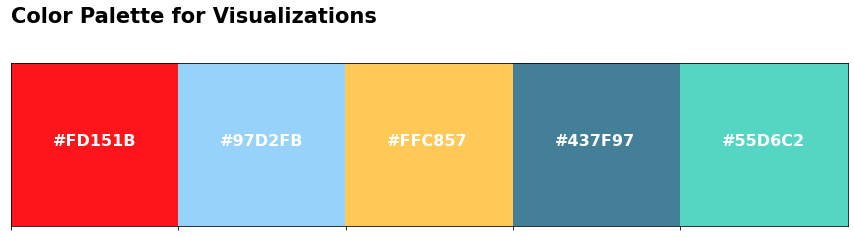

In [3]:
colors= ['#FD151B' ,'#97D2FB' ,'#FFC857' ,'#437F97' ,'#55D6C2']
sns.palplot(colors, size=3)
plt.text(-0.5, -0.75, "Color Palette for Visualizations", {'fontfamily': 'sans-serif', 'size': 21, 'weight':'semibold'})
for idx,values in enumerate(colors):
    plt.text(idx-0.25,0, colors[idx],{'fontfamily':'Poppins, sans-serif', 'size':16, 'weight':'semibold','color':'#fff'}, alpha =1)

In [4]:
# Loading datasets
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">We will take a look at both the Training and Test Data separately to get a clear view of the whole data.</p>

<a id="subsection1"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">1.1 Training Data</h3>

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;"><li>Significant amount of data is missing from the Cabin Column. I'll most probably drop this whole column since it has to many values missing to be of any use in modelling.</li><li>Age column also has missing values but I'll replace these with mean or median in the data preprocessing section.</li><li>Embarked also has missing values.</li></ul>

<h3 style="font-family: 'Poppins', sans-serif; color: #fff; font-size: 18px; text-align: center; background-color: #004BA8; padding: 10px; border-radius: 5px">Univariate Analysis</h3>

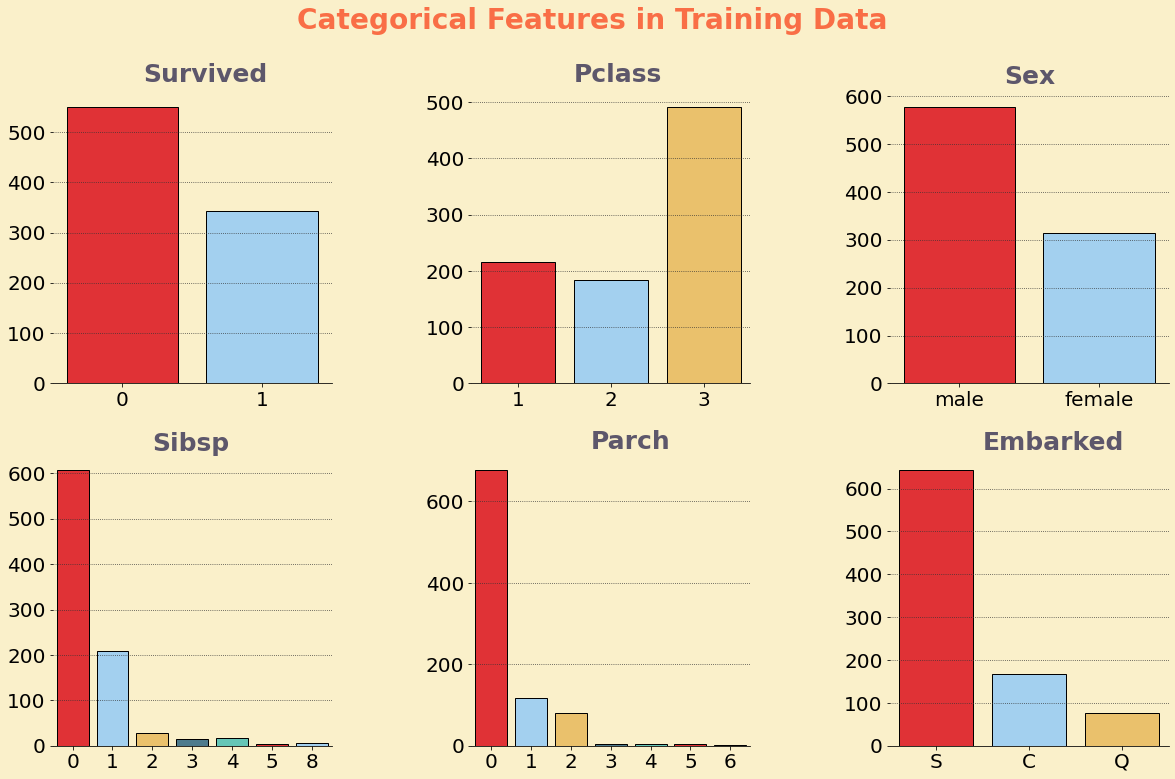

In [8]:
fig = plt.figure(figsize=(20,12))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#FAF0CA"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color)

#Survived Countplot
ax0.text(0.15, 600, 'Survived', fontsize=25, color='#5D576B', weight='bold')
ax0.grid(axis='y', color="#333", linestyle=':')
ax0.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('Survived', data=df_train, palette=colors, ax=ax0, edgecolor="black").set(xlabel="", ylabel="")

#Pclass Countplot
ax1.text(0.6, 536, 'Pclass', fontsize=25, color='#5D576B', weight='bold')
ax1.grid(axis='y', color="#333", linestyle=':')
ax1.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('Pclass', data=df_train, palette=colors, ax=ax1, edgecolor="black").set(xlabel="", ylabel="")

#Sex Countplot
ax2.text(0.32, 625, 'Sex', fontsize=25, color='#5D576B', weight='bold')
ax2.grid(axis='y', color="#333", linestyle=':')
ax2.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('Sex', data=df_train, palette=colors, ax=ax2, edgecolor="black").set(xlabel="", ylabel="")

#SibSp
ax3.text(2, 650, 'Sibsp', fontsize=25, color='#5D576B', weight='bold')
ax3.grid(axis='y', color="#333", linestyle=':')
ax3.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('SibSp', data=df_train, palette=colors, ax=ax3, edgecolor="black").set(xlabel="", ylabel="")

#Parch
ax4.text(2.5, 730, 'Parch', fontsize=25, color='#5D576B', weight='bold')
ax4.grid(axis='y', color="#333", linestyle=':')
ax4.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('Parch', data=df_train, palette=colors, ax=ax4, edgecolor="black").set(xlabel="", ylabel="")

#Embarked
ax5.text(0.5, 690, 'Embarked', fontsize=25, color='#5D576B', weight='bold')
ax5.grid(axis='y', color="#333", linestyle=':')
ax5.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('Embarked', data=df_train, palette=colors, ax=ax5, edgecolor="black").set(xlabel="", ylabel="")

fig.suptitle('Categorical Features in Training Data', fontsize="28", weight="bold", color="#F96E46")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500;">Interpretations from the above countplots</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>More than 60% people enlisted in this training data did not survive.</li>
    <li>Majority of the people were from Passenger Class 3.</li>
    <li>There were more number of males than females.</li>
    <li>There were more number of people without Siblings or Spouses.</li>
    <li>There were more number of people without Parents or Children</li>
    <li>Large number of people who embarked were from Southamptom.</li>
</ul>

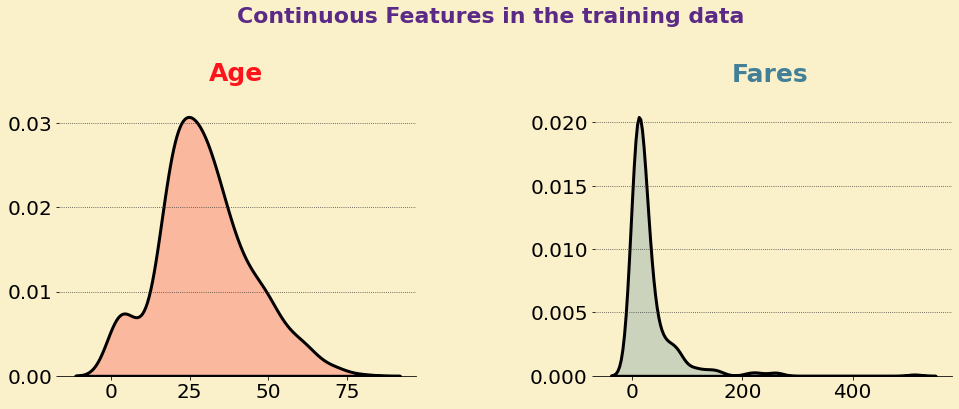

In [9]:
fig = plt.figure(figsize=(16, 5))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.5, hspace=0.25)
axA = fig.add_subplot(gs[0,0])
axB = fig.add_subplot(gs[0,1])

background_color = "#FAF0CA"
fig.patch.set_facecolor(background_color)
axA.set_facecolor(background_color) 
axB.set_facecolor(background_color)

axA.text(31, 0.035, 'Age', fontsize=25, color='#FD151B', weight='bold')
axA.grid(axis='y', color="#333", linestyle=':')
axA.tick_params(axis='both', which='major', labelsize=20)
sns.kdeplot(df_train['Age'], color=colors[0], ax=axA, fill=True, linewidth = 3, ec="black").set(xlabel="", ylabel="")

axB.text(180, 0.0232, 'Fares', fontsize=25, color='#437F97', weight='bold')
axB.grid(axis='y', color="#333", linestyle=':')
axB.tick_params(axis='both', which='major', labelsize=20)
sns.kdeplot(df_train['Fare'], color=colors[3], ax=axB, fill=True, linewidth = 3, ec="black").set(xlabel="", ylabel="")

plt.suptitle("Continuous Features in the training data",fontsize="22", weight="bold", color="#5B2A86", y=1.15, horizontalalignment='center')

for s in ["top","right","left"]:
    axA.spines[s].set_visible(False)
    axB.spines[s].set_visible(False)

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500;">Interpretations from the above KDE plots</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>A large number of people were between the age of 20 and 50 years of age.</li>
    <li>Fares Column has a skewed distribution. We have to scale it accordingly so that it doesn't interfere with our accuracy.</li>
</ul>

<h3 style="font-family: 'Poppins', sans-serif; color: #fff; font-size: 18px; text-align: center; background-color: #004BA8; padding: 10px; border-radius: 5px">Univariate Analysis with respect to Survived Column(Target)</h3>

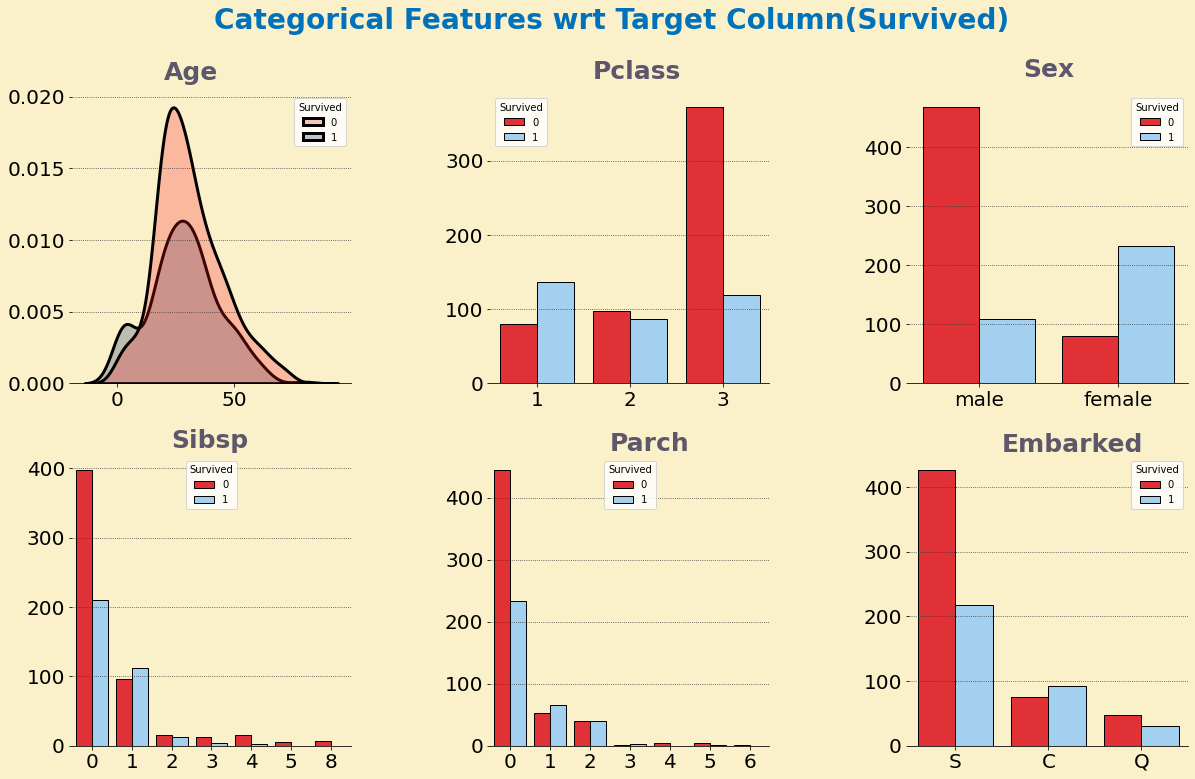

In [10]:
fig = plt.figure(figsize=(20,12))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#FAF0CA"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color)

#Age KDE plot
ax0.text(20, 0.0212, 'Age', fontsize=25, color='#5D576B', weight='bold')
ax0.grid(axis='y', color="#333", linestyle=':')
ax0.tick_params(axis='both', which='major', labelsize=20)
sns.kdeplot('Age', data=df_train, palette=["#FD151B", "#01295F"], ax=ax0, hue="Survived", 
            fill="True",linewidth=3, ec='black').set(xlabel="", ylabel="")

#Pclass Countplot
ax1.text(0.6, 410, 'Pclass', fontsize=25, color='#5D576B', weight='bold')
ax1.grid(axis='y', color="#333", linestyle=':')
ax1.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('Pclass', data=df_train, palette=colors, ax=ax1, edgecolor="black",
              hue="Survived").set(xlabel="", ylabel="")

#Sex Countplot
ax2.text(0.32, 519, 'Sex', fontsize=25, color='#5D576B', weight='bold')
ax2.grid(axis='y', color="#333", linestyle=':')
ax2.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('Sex', data=df_train, palette=colors, ax=ax2, edgecolor="black",
              hue="Survived").set(xlabel="", ylabel="")

#SibSp
ax3.text(2, 430, 'Sibsp', fontsize=25, color='#5D576B', weight='bold')
ax3.grid(axis='y', color="#333", linestyle=':')
ax3.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('SibSp', data=df_train, palette=colors, ax=ax3, edgecolor="black",
              hue="Survived").set(xlabel="", ylabel="")

#Parch
ax4.text(2.5, 475, 'Parch', fontsize=25, color='#5D576B', weight='bold')
ax4.grid(axis='y', color="#333", linestyle=':')
ax4.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('Parch', data=df_train, palette=colors, ax=ax4, edgecolor="black",
              hue="Survived").set(xlabel="", ylabel="")

#Embarked
ax5.text(0.5, 455, 'Embarked', fontsize=25, color='#5D576B', weight='bold')
ax5.grid(axis='y', color="#333", linestyle=':')
ax5.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('Embarked', data=df_train, palette=colors, ax=ax5, edgecolor="black",
              hue="Survived").set(xlabel="", ylabel="")

fig.suptitle('Categorical Features wrt Target Column(Survived)', fontsize="28", 
             weight="bold", color="#0072BB")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500;">Interpretations from the above plots</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Large number of people who died were aged between 20 and 50.</li>
    <li>Majority of the people that died were from Passenger Class 3 and more survived in the first class.</li>
    <li>Majority of the people that died were males.</li>
    <li>It was observed that many people who did not have siblings or spuses did not survive.</li>
    <li>Also, people without Parents or Children did not have much chances of survival either.</li>
    <li>Since large number of people embarked from Southampton, the number of deaths of people from Southamptom was more.</li>
</ul>

<h3 style="font-family: 'Poppins', sans-serif; color: #fff; font-size: 18px; text-align: center; background-color: #004BA8; padding: 10px; border-radius: 5px">Multivariate Analysis</h3>

<AxesSubplot:>

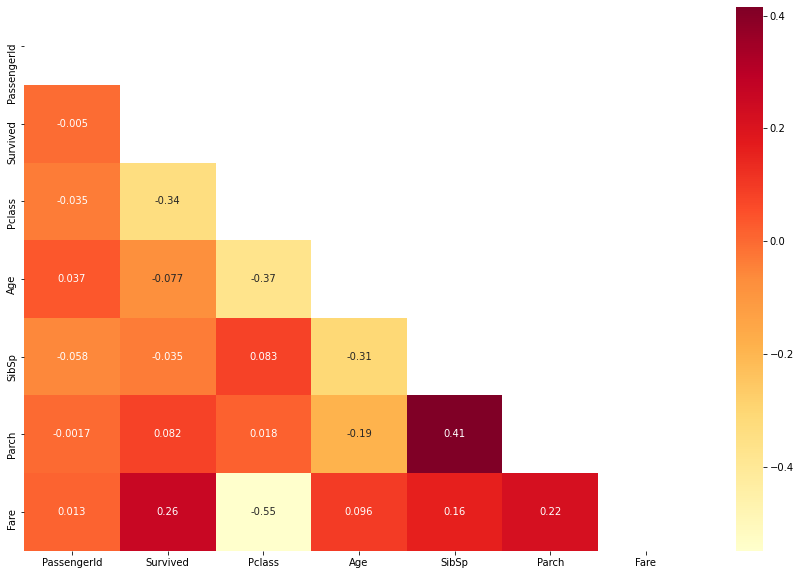

In [11]:
matrix = np.triu(df_train.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot=True, mask=matrix, cmap="YlOrRd")

<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Pclass has a good negative correlation with Fare. Its kinda obvious that as Pclass increases Fare will decrease(Third Class will cost less than First class).</li>
    <li>Fare also has minor positive correlation with Survived. Again people who paid more had more chances of survival.</li>
    <li>SibSp has good positive correlation with Parch. We can concatenate these together into a single family column later on.</li>
</ul>

<a id="boxenplot"></a>

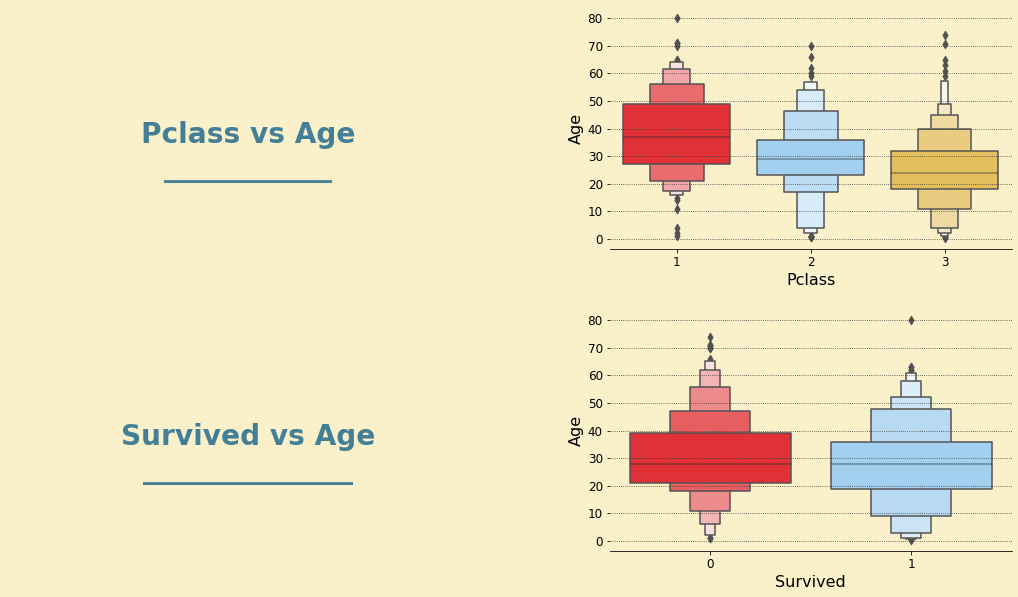

In [12]:
fig = plt.figure(figsize=(18,10))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.25)
axC = fig.add_subplot(gs[0,0])
axD = fig.add_subplot(gs[1,0])
axA = fig.add_subplot(gs[0,1])
axB = fig.add_subplot(gs[1,1])


background_color = "#FAF0CA"
fig.patch.set_facecolor(background_color)
axA.set_facecolor(background_color) 
axB.set_facecolor(background_color)
axC.set_facecolor(background_color)
axD.set_facecolor(background_color)

axA.grid(axis='y', color="#333", linestyle=':')
axA.tick_params(axis='both', which='major', labelsize=12)
axA.set_xlabel('Survived',fontsize=16)
axA.set_ylabel('Age',fontsize=16)
sns.boxenplot(x="Pclass",y="Age",data=df_train, palette=['#FD151B' ,'#97D2FB' ,'#F9C846' ,'#437F97'], ax=axA)

axB.grid(axis='y', color="#333", linestyle=':')
axB.tick_params(axis='both', which='major', labelsize=12)
axB.set_xlabel('Survived',fontsize=16)
axB.set_ylabel('Age',fontsize=16)
sns.boxenplot(x="Survived",y="Age",data=df_train, palette=['#FD151B' ,'#97D2FB' ,'#F9C846' ,'#437F97'], ax=axB)

axC.tick_params(axis='both',left=False, bottom=False)
axC.set_xticklabels([])
axC.set_yticklabels([])
axC.text(0.6,0.4, "Pclass vs Age\n____________",horizontalalignment = 'center',verticalalignment = 'center',
         fontsize = 28,fontweight='bold',fontfamily='sans-serif', color='#437F97')

axD.tick_params(axis='both',left=False, bottom=False)
axD.set_xticklabels([])
axD.set_yticklabels([])
axD.text(0.6,0.4, "Survived vs Age\n_______________",horizontalalignment = 'center',verticalalignment = 'center',
         fontsize = 28,fontweight='bold',fontfamily='sans-serif', color='#437F97')

for s in ["top","right","left", "bottom"]:
    axC.spines[s].set_visible(False)
    axD.spines[s].set_visible(False)

for s in ["top","right","left"]:
    axA.spines[s].set_visible(False)
    axB.spines[s].set_visible(False)

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500;">Interpretations from the above boxenplots</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Pclass 1 had people mostly had people aged between 30 and 50 years. It might be because the more aged people might have better jobs and finances to afford first class.</li>
    <li>Pclass 2 had people aged between 20-40 more.</li>
    <li>Pclass 3 had more people age between 20-30</li>
    <li>Age column has significant outliers as observed from the plots.</li>
</ul>

<a id="subsection2"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">1.2 Test Data</h3>

In [13]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">As you can observe Test Data does not have Target column that is "Survived".</p> 

In [14]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Similar to training data, test data also has lots of values missing in the 'Cabin' Column.</li>
    <li>Age and Fare columns also have missing values but again we can replace these with mean or median accordingly.</li>
</ul> 

<h3 style="font-family: 'Poppins', sans-serif; color: #fff; font-size: 18px; text-align: center; background-color: #004BA8; padding: 10px; border-radius: 5px">Univariate Analysis</h3>

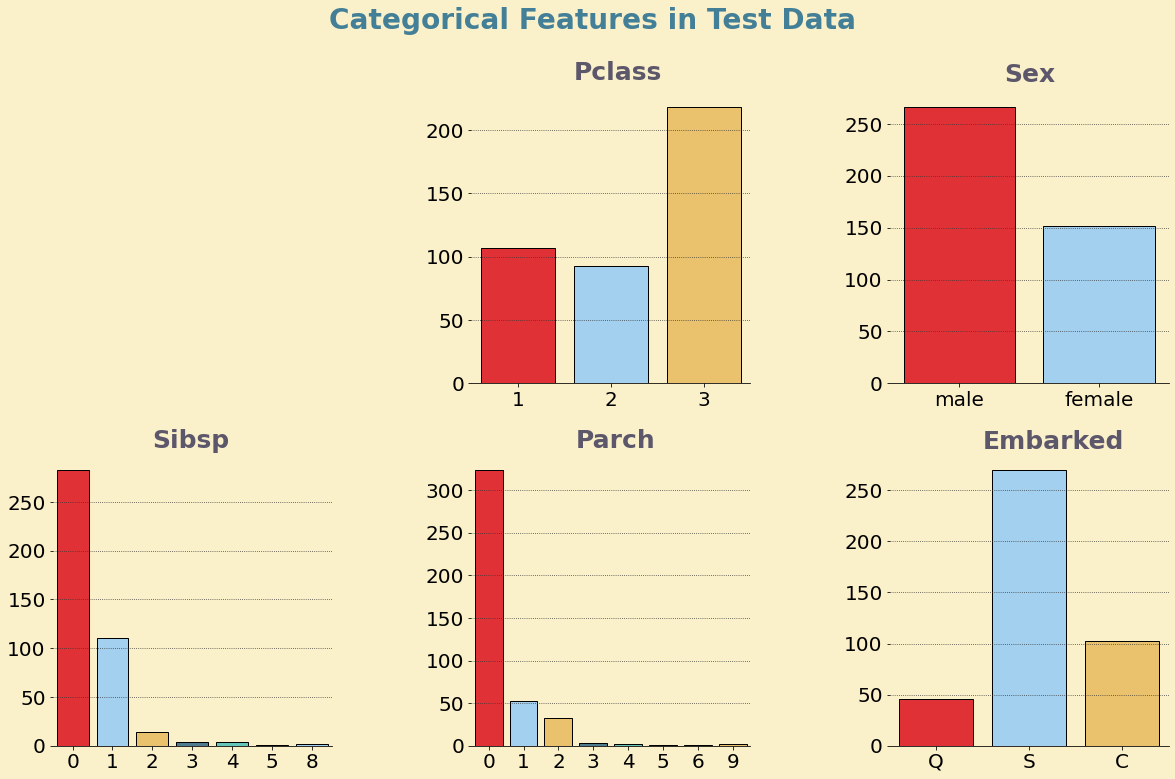

In [16]:
fig = plt.figure(figsize=(20,12))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#FAF0CA"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color)

#Survived Countplot
ax0.tick_params(axis='both',left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

#Pclass Countplot
ax1.text(0.6, 240, 'Pclass', fontsize=25, color='#5D576B', weight='bold')
ax1.grid(axis='y', color="#333", linestyle=':')
ax1.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('Pclass', data=df_test, palette=colors, ax=ax1, edgecolor="black").set(xlabel="", ylabel="")

#Sex Countplot
ax2.text(0.32, 290, 'Sex', fontsize=25, color='#5D576B', weight='bold')
ax2.grid(axis='y', color="#333", linestyle=':')
ax2.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('Sex', data=df_test, palette=colors, ax=ax2, edgecolor="black").set(xlabel="", ylabel="")

#SibSp
ax3.text(2, 305, 'Sibsp', fontsize=25, color='#5D576B', weight='bold')
ax3.grid(axis='y', color="#333", linestyle=':')
ax3.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('SibSp', data=df_test, palette=colors, ax=ax3, edgecolor="black").set(xlabel="", ylabel="")

#Parch
ax4.text(2.5, 350, 'Parch', fontsize=25, color='#5D576B', weight='bold')
ax4.grid(axis='y', color="#333", linestyle=':')
ax4.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('Parch', data=df_test, palette=colors, ax=ax4, edgecolor="black").set(xlabel="", ylabel="")

#Embarked
ax5.text(0.5, 290, 'Embarked', fontsize=25, color='#5D576B', weight='bold')
ax5.grid(axis='y', color="#333", linestyle=':')
ax5.tick_params(axis='both', which='major', labelsize=20)
sns.countplot('Embarked', data=df_test, palette=colors, ax=ax5, edgecolor="black").set(xlabel="", ylabel="")

fig.suptitle('Categorical Features in Test Data', fontsize="28", weight="bold", color="#437F97")

for s in ["top","right","left", "bottom"]:
    ax0.spines[s].set_visible(False)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500;">Interpretations from the above countplots(Test Data)</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Majority of the people were from Passenger Class 3.</li>
    <li>There were more number of males than females.</li>
    <li>There were more number of people without Siblings or Spouses.</li>
    <li>There were more number of people without Parents or Children</li>
    <li>Large number of people who embarked were from Southamptom.</li>
</ul>

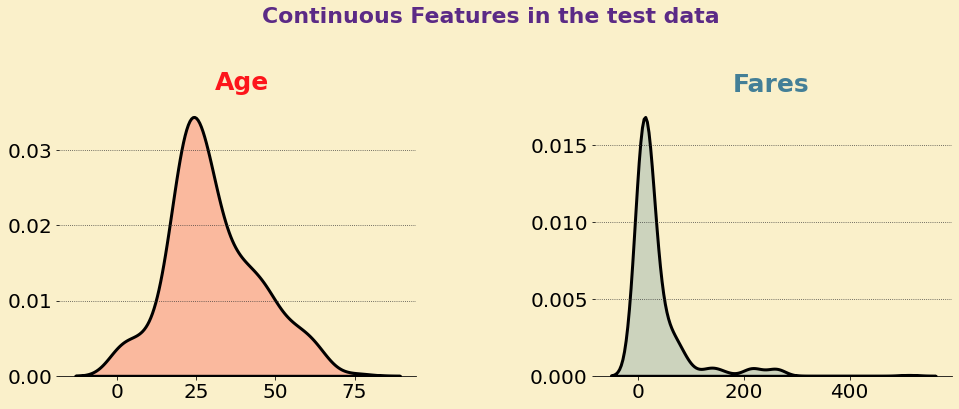

In [17]:
fig = plt.figure(figsize=(16, 5))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.5, hspace=0.25)
axA = fig.add_subplot(gs[0,0])
axB = fig.add_subplot(gs[0,1])

background_color = "#FAF0CA"
fig.patch.set_facecolor(background_color)
axA.set_facecolor(background_color) 
axB.set_facecolor(background_color)

axA.text(31, 0.038, 'Age', fontsize=25, color='#FD151B', weight='bold')
axA.grid(axis='y', color="#333", linestyle=':')
axA.tick_params(axis='both', which='major', labelsize=20)
sns.kdeplot(df_test['Age'], color=colors[0], ax=axA, fill=True, linewidth = 3, ec="black").set(xlabel="", ylabel="")

axB.text(180, 0.0185, 'Fares', fontsize=25, color='#437F97', weight='bold')
axB.grid(axis='y', color="#333", linestyle=':')
axB.tick_params(axis='both', which='major', labelsize=20)
sns.kdeplot(df_test['Fare'], color=colors[3], ax=axB, fill=True, linewidth = 3, ec="black").set(xlabel="", ylabel="")

plt.suptitle("Continuous Features in the test data",fontsize="22", weight="bold", color="#5B2A86", y=1.15, horizontalalignment='center')

for s in ["top","right","left"]:
    axA.spines[s].set_visible(False)
    axB.spines[s].set_visible(False)

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500;">Interpretations from the above KDE plots</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>A large number of people were between the age of 20 and 50 years of age.</li>
    <li>Again Fares Column has a skewed distribution.</li>
</ul>

<a id="section3"></a>
<h1 style="font-family: 'Poppins', sans-serif; color: #ff6701; font-size: 26px; text-align: left; background-color: #fcecdd; padding: 20px; border-radius: 10px; font-weight:600;">2. Data Preprocessing and Cleaning</h1> 

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500;">What are the problems with this data as of now?</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Passenger Id is irrelevant to the survival of people.</li>
    <li>Both Training Data and Test Data have missing values in Cabin, Age, Embarked, and Fare columns. I'll remove the cabin column as a whole as more than 70% of the data is missing.  </li>
    <li>Fare Column is skewed and model may predict based off the prices for which largest number of data is present. Common transformations to handle skewed variables include square root (sqrt(x)), logarithmic (log(x)), and reciprocal (1/x). </li>
    <li>The names in this dataset have many titles such as Mr, Mrs, Miss, Duke, etc. We can separate people according to the titles and also I'll try to reduce these titles.</li>
</ul>

<a id="subsection3"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">2.1 Handling Missing Values</h3>

<AxesSubplot:>

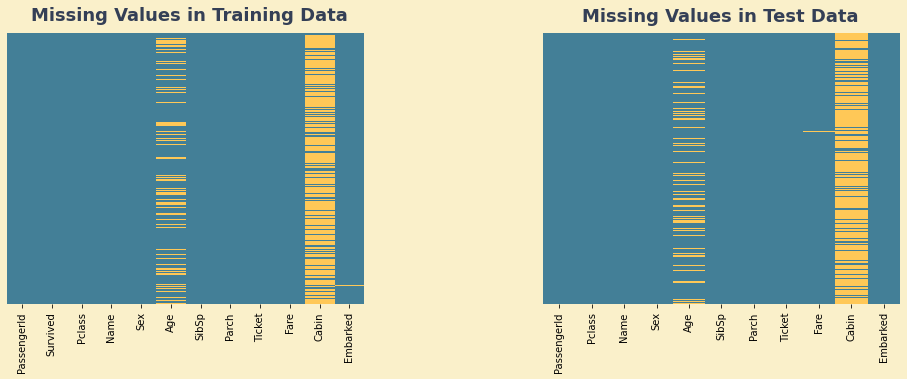

In [18]:
fig = plt.figure(figsize=(16, 5))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.5, hspace=0.25)
axA = fig.add_subplot(gs[0,0])
axB = fig.add_subplot(gs[0,1])

background_color = "#FAF0CA"
fig.patch.set_facecolor(background_color)
axA.set_facecolor(background_color) 
axB.set_facecolor(background_color)

axA.text(0.8, -40, 'Missing Values in Training Data', fontsize=18, color='#343f56', weight='bold')
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap=['#437F97','#FFC857'], ax=axA)

axB.text(1.2, -17, 'Missing Values in Test Data', fontsize=18, color='#343f56', weight='bold')
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap=['#437F97','#FFC857'], ax=axB)

<h3 style="font-family: 'Poppins', sans-serif; color: #343f56; font-size: 18px; text-align: left;">Cabin Column</h3>

In [19]:
# Cabin Column has too many missing values to be of any significant use
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

<h3 style="font-family: 'Poppins', sans-serif; color: #343f56; font-size: 18px; text-align: left;">Age Column</h3>

<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">We can't obviously drop the whole age column like we did earlier. Instead I'm going to impute values into the missing and I'll do that by taking median age from each of the passenger class.</p>
<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">Check out the relation between Age and Pclass <a href='#boxenplot'>here</a></p>
<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">So we replace the missing age of people by the median age of the class they were in.</p>


In [20]:
print('Training Data')
print('The median age of people in First Class: ',df_train[df_train['Pclass']==1]['Age'].median())
print('The median age of people in Second Class: ',df_train[df_train['Pclass']==2]['Age'].median())
print('The median age of people in Third Class: ',df_train[df_train['Pclass']==3]['Age'].median())

Training Data
The median age of people in First Class:  37.0
The median age of people in Second Class:  29.0
The median age of people in Third Class:  24.0


In [21]:
print('Test Data')
print('The median age of people in First Class: ',df_test[df_test['Pclass']==1]['Age'].median())
print('The median age of people in Second Class: ',df_test[df_test['Pclass']==2]['Age'].median())
print('The median age of people in Third Class: ',df_test[df_test['Pclass']==3]['Age'].median())

Test Data
The median age of people in First Class:  42.0
The median age of people in Second Class:  26.5
The median age of people in Third Class:  24.0


In [22]:
# creating a function for imputation in Training Data
def impute_age_train(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [23]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(impute_age_train, axis=1)

In [24]:
# creating a function for imputation in Test Data
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 26
        else:
            return 24
    else:
        return Age

In [25]:
df_test['Age'] = df_test[['Age', 'Pclass']].apply(impute_age_test, axis=1)

<h3 style="font-family: 'Poppins', sans-serif; color: #343f56; font-size: 18px; text-align: left;">Embarked Column in Train Data</h3>

<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">On reference to other notebooks, I found that the two values missing in Embarked column are of one Mrs. George Nelson and her maid Miss Martha Evelyn. They both embarked from Southampton.</p>

In [26]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [27]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

<h3 style="font-family: 'Poppins', sans-serif; color: #343f56; font-size: 18px; text-align: left;">Fare Column in Test Data</h3>

In [28]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">Since this person was travelling in third class, we can replace it by the mean fare of people from third class.</p>

In [29]:
print('The mean fare of people in Third Class: ',df_train[df_train['Pclass']==3]['Fare'].mean())

The mean fare of people in Third Class:  13.675550101832993


In [30]:
df_test['Fare'] = df_test['Fare'].fillna(13.68)

<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">Now lets check our missing values graph again!</p>

<AxesSubplot:>

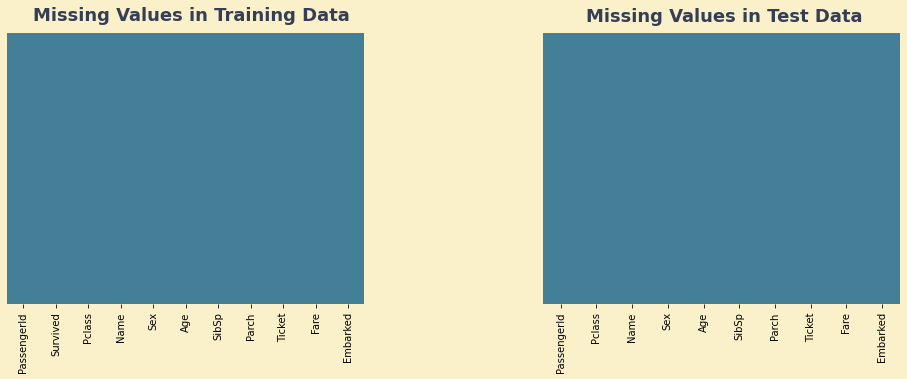

In [31]:
fig = plt.figure(figsize=(16, 5))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.5, hspace=0.25)
axA = fig.add_subplot(gs[0,0])
axB = fig.add_subplot(gs[0,1])

background_color = "#FAF0CA"
fig.patch.set_facecolor(background_color)
axA.set_facecolor(background_color) 
axB.set_facecolor(background_color)

axA.text(0.8, -40, 'Missing Values in Training Data', fontsize=18, color='#343f56', weight='bold')
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap=['#437F97','#FFC857'], ax=axA)

axB.text(1.2, -17, 'Missing Values in Test Data', fontsize=18, color='#343f56', weight='bold')
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap=['#437F97','#FFC857'], ax=axB)

<p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 600">PERFECT!!</p>

<a id="subsection4"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">2.2 Removing Irrelevant Columns</h3>

<p style="font-family: 'Poppins', sans-serif; font-size: 18px;">Passenger Id is an irrelevelant column that is not needed for our machine learning purposes.</p>

In [32]:
df_train.drop('PassengerId', axis=1, inplace=True)

In [33]:
df_test.drop('PassengerId', axis=1, inplace=True)

<a id="subsection5"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">2.3 Skewnees of Fare Column</h3>

<p style="font-family: 'Poppins', sans-serif; font-size: 18px;">As you can observe here the graph is quite right skewed. So I'll tranform this distribution to a normal one using log tranformation.</p>

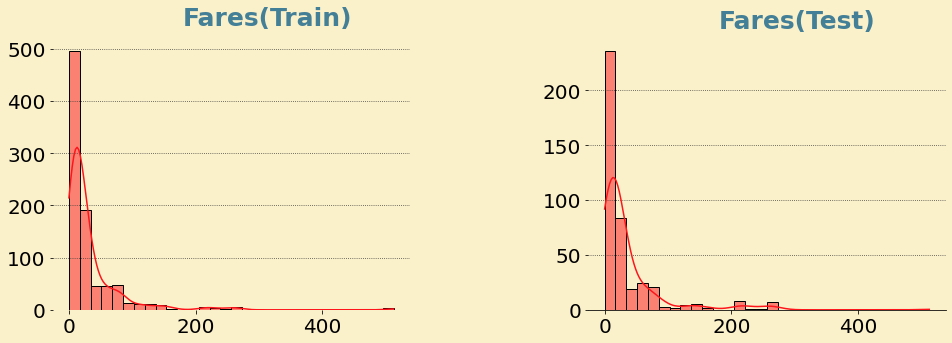

In [34]:
fig = plt.figure(figsize=(16, 5))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.5, hspace=0.25)
axA = fig.add_subplot(gs[0,0])
axB = fig.add_subplot(gs[0,1])

background_color = "#FAF0CA"
fig.patch.set_facecolor(background_color)
axA.set_facecolor(background_color) 
axB.set_facecolor(background_color)

axA.text(180, 545, 'Fares(Train)', fontsize=25, color='#437F97', weight='bold')
axA.grid(axis='y', color="#333", linestyle=':')
axA.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(df_train['Fare'], color=colors[0], ax=axA, linewidth = 1, ec="black", bins=30, kde=True).set(xlabel="", ylabel="")

axB.text(180, 257, 'Fares(Test)', fontsize=25, color='#437F97', weight='bold')
axB.grid(axis='y', color="#333", linestyle=':')
axB.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(df_test['Fare'], color=colors[0], ax=axB, linewidth = 1, ec="black", bins=30, kde=True).set(xlabel="", ylabel="")

for s in ["top","right","left", "bottom"]:
    axA.spines[s].set_visible(False)
    
for s in ["top","right","left"]:
    axB.spines[s].set_visible(False)

In [35]:
df_train["Fare"] = df_train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
df_test["Fare"] = df_test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

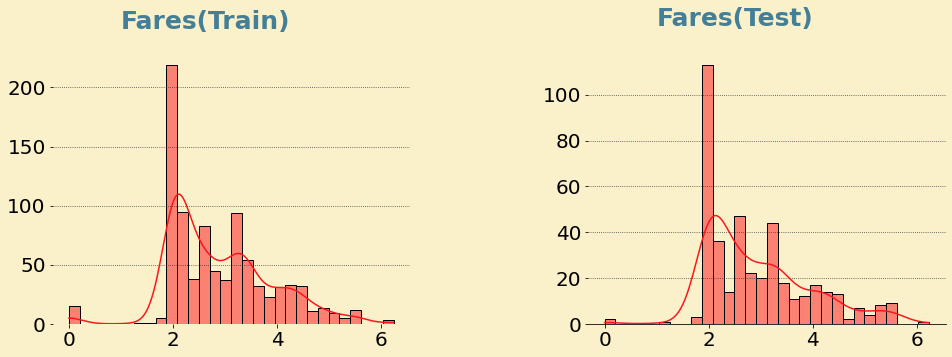

In [36]:
fig = plt.figure(figsize=(16, 5))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.5, hspace=0.25)
axA = fig.add_subplot(gs[0,0])
axB = fig.add_subplot(gs[0,1])

background_color = "#FAF0CA"
fig.patch.set_facecolor(background_color)
axA.set_facecolor(background_color) 
axB.set_facecolor(background_color)

axA.text(1, 250, 'Fares(Train)', fontsize=25, color='#437F97', weight='bold')
axA.grid(axis='y', color="#333", linestyle=':')
axA.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(df_train['Fare'], color=colors[0], ax=axA, linewidth = 1, ec="black", bins=30, kde=True).set(xlabel="", ylabel="")

axB.text(1, 130, 'Fares(Test)', fontsize=25, color='#437F97', weight='bold')
axB.grid(axis='y', color="#333", linestyle=':')
axB.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(df_test['Fare'], color=colors[0], ax=axB, linewidth = 1, ec="black", bins=30, kde=True).set(xlabel="", ylabel="")

for s in ["top","right","left", "bottom"]:
    axA.spines[s].set_visible(False)
    
for s in ["top","right","left"]:
    axB.spines[s].set_visible(False)

<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">Transforming with log doesn't make it perfectly normal but I guess we can work with this.</p>

<a id="subsection6"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">2.4 Binning of Age Column</h3>

<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">Binning of continuous variable introduces non-linearity and tends to improve the performance of the model. There were also small spikes and bumps in our normal distribution.</p>


In [37]:
df_train['Age'] = pd.qcut(df_train['Age'], 10, duplicates='drop')
df_test['Age'] = pd.qcut(df_test['Age'], 10, duplicates='drop')

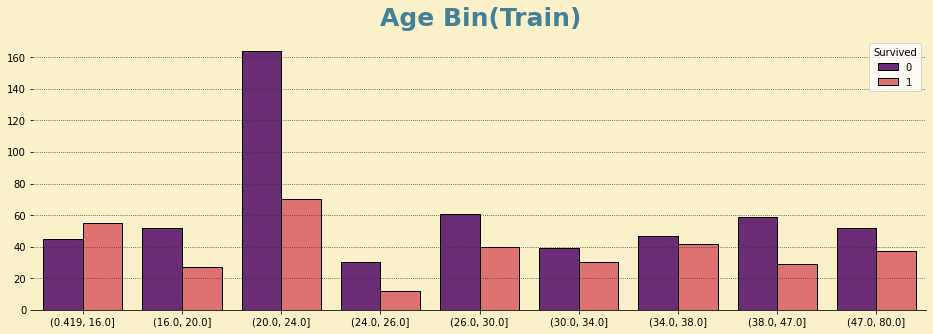

In [38]:
fig = plt.figure(figsize=(16, 5))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.5, hspace=0.25)
axA = fig.add_subplot(gs[0,0])

background_color = "#FAF0CA"
fig.patch.set_facecolor(background_color)
axA.set_facecolor(background_color) 
axB.set_facecolor(background_color)

axA.text(3, 180, 'Age Bin(Train)', fontsize=25, color='#437F97', weight='bold')
axA.grid(axis='y', color="#333", linestyle=':')
axA.tick_params(axis='both', which='major', labelsize=10)
sns.countplot(x="Age",data=df_train, palette="magma",hue="Survived", ax=axA, linewidth = 1, ec="black").set(xlabel="", ylabel="")

    
for s in ["top","right","left"]:
    axA.spines[s].set_visible(False)
    axB.spines[s].set_visible(False)

<a id="subsection7"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">2.5 Creating different columns for Family Names and Titles</h3>

In [39]:
df_train['FamilyName'] = df_train['Name'].str.split(', ').str[0]

In [40]:
df_train['Title'] =  df_train['Name'].str.split(', ').str[1].str.split('.').str[0]

In [41]:
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">As you can see there are too many titles. I'll just group all the special titles like Major, Col, Capt etc., under 'Other Important'. All other Married Females will be grouped under Mrs. and Unmarried under Ms.</p>

In [42]:
df_train['Title'] = df_train['Title'].replace(['Miss', 'Mlle'], 'Ms')
df_train['Title'] = df_train['Title'].replace(['Mme', 'Lady','the Countess'], 'Mrs')
df_train['Title'] = df_train['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Sir', 'Col', 'Capt','Jonkheer'], 'Other Important')

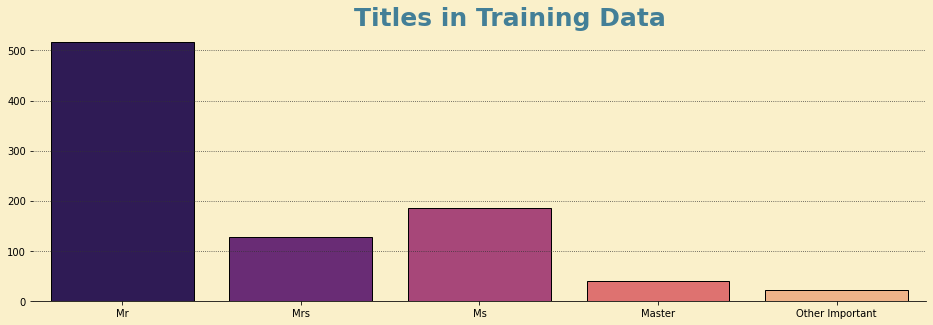

In [43]:
fig = plt.figure(figsize=(16, 5))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.5, hspace=0.25)
axA = fig.add_subplot(gs[0,0])

background_color = "#FAF0CA"
fig.patch.set_facecolor(background_color)
axA.set_facecolor(background_color) 
axB.set_facecolor(background_color)

axA.text(1.3, 550, 'Titles in Training Data', fontsize=25, color='#437F97', weight='bold')
axA.grid(axis='y', color="#333", linestyle=':')
axA.tick_params(axis='both', which='major', labelsize=10)
sns.countplot(x="Title",data=df_train, palette="magma", ax=axA, linewidth = 1, ec="black").set(xlabel="", ylabel="")

    
for s in ["top","right","left"]:
    axA.spines[s].set_visible(False)
    axB.spines[s].set_visible(False)

In [44]:
df_test['FamilyName'] = df_test['Name'].str.split(', ').str[0]

In [45]:
df_test['Title'] =  df_test['Name'].str.split(', ').str[1].str.split('.').str[0]

In [46]:
df_test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [47]:
df_test['Title'] = df_test['Title'].replace(['Miss'], 'Ms')
df_test['Title'] = df_test['Title'].replace(['Dona'], 'Mrs')
df_test['Title'] = df_test['Title'].replace(['Rev', 'Dr', 'Col'], 'Other Important')

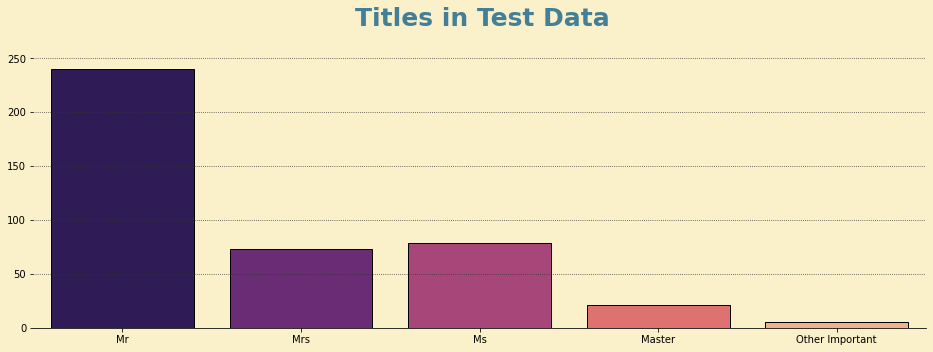

In [48]:
fig = plt.figure(figsize=(16, 5))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.5, hspace=0.25)
axA = fig.add_subplot(gs[0,0])

background_color = "#FAF0CA"
fig.patch.set_facecolor(background_color)
axA.set_facecolor(background_color) 
axB.set_facecolor(background_color)

axA.text(1.3, 280, 'Titles in Test Data', fontsize=25, color='#437F97', weight='bold')
axA.grid(axis='y', color="#333", linestyle=':')
axA.tick_params(axis='both', which='major', labelsize=10)
sns.countplot(x="Title",data=df_test, palette="magma", ax=axA, linewidth = 1, ec="black").set(xlabel="", ylabel="")

    
for s in ["top","right","left"]:
    axA.spines[s].set_visible(False)
    axB.spines[s].set_visible(False)

<a id="subsection14"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">2.6 Adding SibSp and Parch to form new column FamilySize</h3>

In [49]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']+1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']+1

In [50]:
df_train.loc[ df_train['FamilySize'] == 1, 'FamilySize'] = 0                            
# Alone
df_train.loc[(df_train['FamilySize'] > 1) & (df_train['FamilySize'] <= 4), 'FamilySize'] = 1  
# Small Family 
df_train.loc[(df_train['FamilySize'] > 4) & (df_train['FamilySize'] <= 6), 'FamilySize'] = 2  
# Medium Family
df_train.loc[df_train['FamilySize']  > 6, 'FamilySize'] = 3                             
# Large Family 

In [51]:
df_test.loc[ df_test['FamilySize'] == 1, 'FamilySize'] = 0                            
# Alone
df_test.loc[(df_test['FamilySize'] > 1) & (df_test['FamilySize'] <= 4), 'FamilySize'] = 1  
# Small Family 
df_test.loc[(df_test['FamilySize'] > 4) & (df_test['FamilySize'] <= 6), 'FamilySize'] = 2  
# Medium Family
df_test.loc[df_test['FamilySize']  > 6, 'FamilySize'] = 3                             
# Large Family 

In [52]:
df_train.drop(['SibSp','Parch'], axis = 1, inplace = True)
df_test.drop(['SibSp','Parch'], axis = 1, inplace = True)

<a id="section4"></a>
<h1 style="font-family: 'Poppins', sans-serif; color: #ff6701; font-size: 26px; text-align: left; background-color: #fcecdd; padding: 20px; border-radius: 10px; font-weight:600;">3. Encoding Categorical Features</h1> 

In [53]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

<h3 style="font-family: 'Poppins', sans-serif; color: #343f56; font-size: 18px; text-align: left;">Label Encoding</h3>

In [54]:
non_num = ['Sex', 'Embarked', 'Title']

for feature in non_num:
    df_train[feature] = LabelEncoder().fit_transform(df_train[feature])
    df_test[feature] = LabelEncoder().fit_transform(df_test[feature])

<h3 style="font-family: 'Poppins', sans-serif; color: #343f56; font-size: 18px; text-align: left;">One Hot Encoding</h3>

Used basically for creating indicator variables

In [55]:
cat_feats = ['Sex', 'Embarked', 'Pclass', 'Title', 'FamilySize']

encoded_train_df_feats = []

for feature in cat_feats:
    encoded_feats_train = OneHotEncoder().fit_transform(df_train[feature].values.reshape(-1,1)).toarray()
    n = df_train[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n+1)]
    encoded_df = pd.DataFrame(encoded_feats_train, columns=cols)
    encoded_df.index = df_train.index
    encoded_train_df_feats.append(encoded_df)
    

In [56]:
encoded_test_df_feats = []

for feature in cat_feats:
    encoded_feats_test = OneHotEncoder().fit_transform(df_test[feature].values.reshape(-1,1)).toarray()
    n = df_test[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n+1)]
    encoded_dft = pd.DataFrame(encoded_feats_test, columns=cols)
    encoded_dft.index = df_test.index
    encoded_test_df_feats.append(encoded_dft)

In [57]:
df_train = pd.concat([df_train, *encoded_train_df_feats], axis=1)

In [58]:
df_test = pd.concat([df_test, *encoded_test_df_feats], axis=1)

<h3 style="font-family: 'Poppins', sans-serif; color: #343f56; font-size: 18px; text-align: left;">Final Data Modifications</h3>

In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    int64   
 4   Age           891 non-null    category
 5   Ticket        891 non-null    object  
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    int64   
 8   FamilyName    891 non-null    object  
 9   Title         891 non-null    int64   
 10  FamilySize    891 non-null    int64   
 11  Sex_1         891 non-null    float64 
 12  Sex_2         891 non-null    float64 
 13  Embarked_1    891 non-null    float64 
 14  Embarked_2    891 non-null    float64 
 15  Embarked_3    891 non-null    float64 
 16  Pclass_1      891 non-null    float64 
 17  Pclass_2      891 non-null    float64 
 18  Pclass_3  

<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">There are features like Names, Family Names which are not useful for our models as these are objects, not ints or floats. So we need to drop these columns.</p>
<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">Also, since we have hot encoded columns like sex, embarked etc we dont need the original columns again now. So we drop that also.</p>

In [60]:
drop_cols = ['Name','Ticket', 'Pclass', 'Sex', 'Title', 'Embarked','FamilyName', 'FamilySize']
df_train.drop(columns=drop_cols, inplace=True)

In [61]:
df_test.drop(columns=drop_cols, inplace=True)

<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">Final Train and Test Data:</p>

In [62]:
df_train.head()

,Survived,Age,Fare,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3,Pclass_1,Pclass_2,Pclass_3,Title_1,Title_2,Title_3,Title_4,Title_5,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4
0,0,"(20.0, 24.0]",1.981001,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,"(34.0, 38.0]",4.266662,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,"(24.0, 26.0]",2.070022,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,"(34.0, 38.0]",3.972177,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,"(34.0, 38.0]",2.085672,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [63]:
df_test.head()

,Age,Fare,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3,Pclass_1,Pclass_2,Pclass_3,Title_1,Title_2,Title_3,Title_4,Title_5,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4
0,"(33.0, 41.0]",2.057860,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,"(41.0, 48.0]",1.945910,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,"(48.0, 76.0]",2.270836,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,"(25.0, 28.1]",2.159003,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,"(21.0, 24.0]",2.508582,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Forgot to label encode Age column!

In [64]:
df_train['Age'] = LabelEncoder().fit_transform(df_train['Age'])
df_test['Age'] = LabelEncoder().fit_transform(df_test['Age'])

<a id="section5"></a>
<h1 style="font-family: 'Poppins', sans-serif; color: #ff6701; font-size: 26px; text-align: left; background-color: #fcecdd; padding: 20px; border-radius: 10px; font-weight:600;">4. Classification Models</h1> 

<a id="subsection8"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">4.1 Preparing Data for Models</h3>

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# Scaling...
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="subsection9"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">4.2 Logistic Regression</h3>

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [69]:
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train, y_train)
prediction1 = logmodel.predict(X_test)

In [70]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction1))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction1))

Confusion Matrix:
 [[138  19]
 [ 30  81]]


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



<h3 style="font-family: 'Poppins', sans-serif; color: #343f56; font-size: 18px; text-align: left;">Hyperparameter Tuning for Logistic Regression</h3>

In [71]:
logmodel2 = LogisticRegression(C= 0.09858667904100823,
 max_iter= 200,
 penalty= 'l2',
 solver= 'liblinear')

In [72]:
logmodel2.fit(X_train, y_train)

LogisticRegression(C=0.09858667904100823, max_iter=200, solver='liblinear')

In [73]:
log_grid_preds = logmodel2.predict(X_test)

In [74]:
print('Confusion Matrix:\n', confusion_matrix(y_test, log_grid_preds))
print('\n')
print('Classification Report:\n', classification_report(y_test, log_grid_preds))

Confusion Matrix:
 [[138  19]
 [ 29  82]]


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       157
           1       0.81      0.74      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



<a id="subsection10"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">4.3 K Nearest Neighbours</h3>

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)

In [77]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))

Confusion Matrix:
 [[127  30]
 [ 29  82]]


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       157
           1       0.73      0.74      0.74       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">As you can see the acuracy is not that good. So I'll plot a graph between error rate and n_neighbors and get the value for n_neighbors where the error rate is lowest!</p>

In [78]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

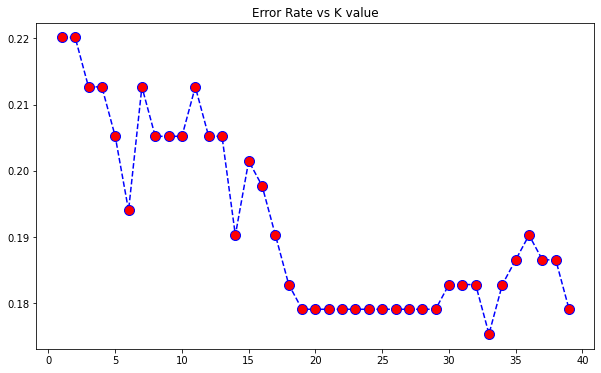

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel = ('K')
plt.ylabel = ('Error Rate')

<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">Lowest Error Rate observed at K value of 33</p>

In [80]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)

In [81]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))

Confusion Matrix:
 [[144  13]
 [ 34  77]]


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       157
           1       0.86      0.69      0.77       111

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.83      0.82      0.82       268



<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">A significant increase in accuracy is observed.</p>

<a id="subsection11"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">4.4 Random Forest</h3>

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
prediction3 = rfc.predict(X_test)

In [84]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction3))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction3))

Confusion Matrix:
 [[136  21]
 [ 32  79]]


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



<h3 style="font-family: 'Poppins', sans-serif; color: #343f56; font-size: 18px; text-align: left;">Hyperparameter Tuning for Random Forest</h3>

In [85]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num=10)] 
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

In [86]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [87]:
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, verbose=3, cv=10, n_jobs = 4)

In [90]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=200),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=3)

In [91]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 56}

In [92]:
grid_predictions = grid_search.predict(X_test)

In [93]:
print("Confusion Matrix: \n", confusion_matrix(y_test, grid_predictions))
print("\n")
print(classification_report(y_test, grid_predictions))

Confusion Matrix: 
 [[142  15]
 [ 30  81]]


              precision    recall  f1-score   support

           0       0.83      0.90      0.86       157
           1       0.84      0.73      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">After tuning the model now has 83% accuracy approx.</p>

<a id="subsection12"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">4.5 Support Vector Machines</h3>

In [94]:
from sklearn.svm import SVC

In [95]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
predictions4 = svc_model.predict(X_test)

In [96]:
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions4))
print('\n')
print('Classification Report:\n', classification_report(y_test, predictions4))

Confusion Matrix:
 [[141  16]
 [ 37  74]]


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       157
           1       0.82      0.67      0.74       111

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



<h3 style="font-family: 'Poppins', sans-serif; color: #343f56; font-size: 18px; text-align: left;">Hyperparameter Tuning for SVM</h3>

In [97]:
param_grid_svm = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
rndm_cv = RandomizedSearchCV(estimator=svc_model, param_distributions=param_grid_svm, cv=10, verbose=2)

In [100]:
rndm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.1s
[CV] END .................................C=1000, gamma=0.01; total time=   0.1s
[CV] END .................................C=1000, gamma=0.01; total time=   0.1s
[CV] END .................................C=1000, gamma=0.01; total time=   0.1s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.1s
[CV] END .................................C=1000, gamma=0.01; total time=   0.1s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.1s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                   verbose=2)

In [101]:
rndm_preds = rndm_cv.predict(X_test)

In [102]:
print('Confusion Matrix:\n', confusion_matrix(y_test, rndm_preds))
print('\n')
print('Classification Report:\n', classification_report(y_test, rndm_preds))

Confusion Matrix:
 [[138  19]
 [ 36  75]]


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.80      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



<a id="subsection16"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">4.6 Stochastic Gradient Boosting</h3>

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)

In [104]:
sgb.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.7, subsample=0.9)

In [105]:
sgb_preds = sgb.predict(X_test)

In [106]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb_preds)}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb_preds)}")

Confusion Matrix :- 
[[143  14]
 [ 34  77]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       157
           1       0.85      0.69      0.76       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



<a id="subsection17"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">4.7 XG Boost</h3>

In [107]:
from xgboost import XGBClassifier

In [108]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

[15:38:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
xgb_preds = xgb.predict(X_test)

In [110]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb_preds)}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb_preds)}")

Confusion Matrix :- 
[[138  19]
 [ 30  81]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



<h3 style="font-family: 'Poppins', sans-serif; color: #343f56; font-size: 18px; text-align: left;">Hyperparameter Tuning for XGB</h3>

In [111]:
params_xgb={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [int(x) for x in np.linspace(start = 10, stop = 80, num=10)] 
}

In [112]:
xgb_rndm_cv = RandomizedSearchCV(estimator=xgb, param_distributions=params_xgb, cv=10, verbose=2)

In [113]:
xgb_rndm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[15:38:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=10; total time=   0.0s
[15:38:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=10; total time=   0.0s
[15:38:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'l

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=5, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=180, n_jobs=4,
                                           num_parallel_...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, sub

In [114]:
xgb_rndm_preds = xgb_rndm_cv.predict(X_test)

In [115]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb_rndm_preds)}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb_rndm_preds)}")

Confusion Matrix :- 
[[139  18]
 [ 35  76]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.81      0.68      0.74       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



<a id="subsection17"></a>
<h3 style="font-family: 'Poppins', sans-serif; color: #8F2D56; font-size: 18px; text-align: left; background-color: #FFBC42; padding: 15px; border-radius: 5px">4.8 Voting Classifer</h3>

In [116]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Stochastic Gradient Boosting', sgb), ('XGboost', xgb),
               ('Random Forest', rfc), ('Logistic', logmodel), ('KNN', knn), ('SVM', grid_search)]

In [117]:
vc = VotingClassifier(estimators = classifiers)

In [118]:
vc.fit(X_train, y_train)

[15:38:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 10 folds for each of 320 candidates, totalling 3200 fits


VotingClassifier(estimators=[('Stochastic Gradient Boosting',
                              GradientBoostingClassifier(max_features=0.7,
                                                         subsample=0.9)),
                             ('XGboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=5, m...
                             ('Logistic', LogisticRegression(max_iter=200)),
                             ('KNN', KNeighborsClassifier(n_neighbors=33)),
                     

In [119]:
vc_preds = vc.predict(X_test)

In [120]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, vc_preds)}\n")
print(f"Classification Report :- \n {classification_report(y_test, vc_preds)}")

Confusion Matrix :- 
[[143  14]
 [ 35  76]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       157
           1       0.84      0.68      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268



<a id="section6"></a>
<h1 style="font-family: 'Poppins', sans-serif; color: #ff6701; font-size: 26px; text-align: left; background-color: #fcecdd; padding: 20px; border-radius: 10px; font-weight:600;">5. Results</h1> 

In [121]:
print('The accuracy score of Logistic Regression Model is: ', accuracy_score(y_test, prediction1)*100,'%')
print('The accuracy score of K Nearest Neighbors Model is: ', accuracy_score(y_test, prediction2)*100,'%')
print('The accuracy score of Random Forests Model is: ', accuracy_score(y_test, grid_predictions)*100,'%')
print('The accuracy score of SVM Model is: ', accuracy_score(y_test, rndm_preds)*100,'%')
print('The accuracy score of Stochastic Gradient Boosting  is: ', accuracy_score(y_test, sgb_preds)*100,'%')
print('The accuracy score of XG Boost  is: ', accuracy_score(y_test, xgb_rndm_preds)*100,'%')
print('The accuracy score of Voting Classifer  is: ', accuracy_score(y_test, vc_preds)*100,'%')

The accuracy score of Logistic Regression Model is:  81.71641791044776 %
The accuracy score of K Nearest Neighbors Model is:  82.46268656716418 %
The accuracy score of Random Forests Model is:  83.2089552238806 %
The accuracy score of SVM Model is:  79.47761194029852 %
The accuracy score of Stochastic Gradient Boosting  is:  82.08955223880598 %
The accuracy score of XG Boost  is:  80.22388059701493 %
The accuracy score of Voting Classifer  is:  81.71641791044776 %


In [122]:
lr_acc = accuracy_score(y_test, prediction1)
knn_acc = accuracy_score(y_test, prediction2)
rfc_acc = accuracy_score(y_test, grid_predictions)
SVM_acc = accuracy_score(y_test, rndm_preds)
sgb_acc = accuracy_score(y_test, sgb_preds)
xgb_acc = accuracy_score(y_test, xgb_rndm_preds)
vc_acc = accuracy_score(y_test, vc_preds)

In [123]:
model = ['Logistic Regression', 'K Nearest Neighbors', 'Random Forests', 'Support Vector Machines',
         'Stochastic Gradient Booster', 'XGBoost', 'Voting Classifier']
score = [lr_acc, knn_acc, rfc_acc, SVM_acc, sgb_acc, xgb_acc, vc_acc]

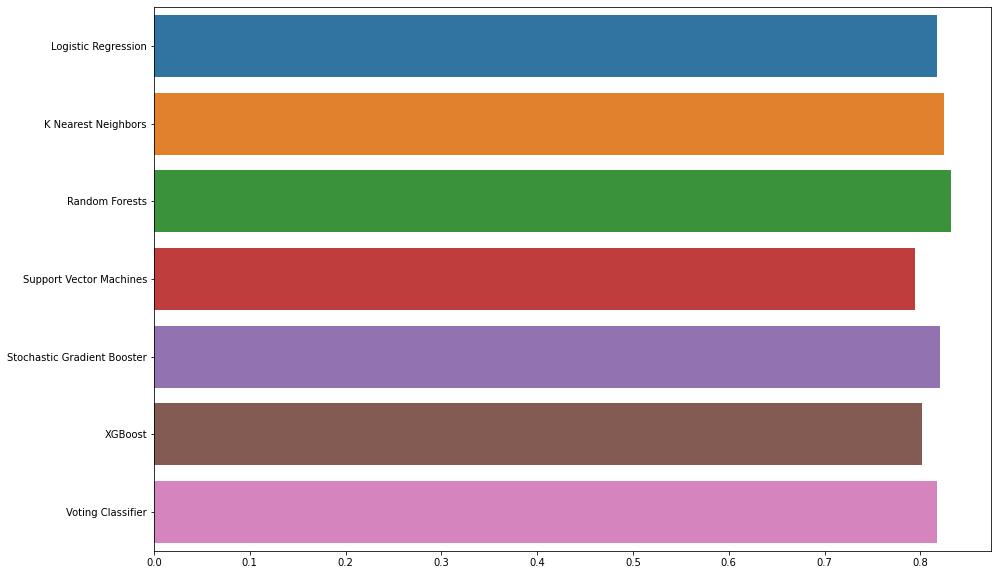

In [124]:
plt.figure(figsize = (15, 10))
sns.barplot(x = score, y = model)
plt.show()

<h3 style="font-family: 'Poppins', sans-serif; color: #343f56; font-size: 18px; text-align: left;">Logistic Regression to predict the Test Data</h3>

I got a 0.77 score after a trial and error method by using all the models discussed above

In [125]:
passengerdf = pd.read_csv('/kaggle/input/titanic/test.csv')

In [126]:
final_preds = logmodel2.predict(df_test)

In [127]:
final_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [128]:
submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = passengerdf['PassengerId']
submission_df['Survived'] = final_preds

In [129]:
submission_df.to_csv('submissions.csv', header=True, index=False)

<h1 style="font-family: 'Poppins', sans-serif; font-size: 30px; color:#fff; background-color: #40476D; padding: 15px; border-radius: 10px; text-align: center;">If you like this notebook, Please leave an Upvote!</h1>

<p style="font-family: 'Poppins', sans-serif; font-size: 16px; font-weight: 600;">Reference:</p>
<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">I referred some notebooks for understanding feature enginnering. These notebooks have many other features which you also can look into if you are a beginner!</p>
<a href="https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial/notebook">https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial/notebook</a>
<a href="https://www.kaggle.com/niteshyadav3103/titanic-eda-prediction-top-8">https://www.kaggle.com/niteshyadav3103/titanic-eda-prediction-top-8</a>

<a href="https://www.kaggle.com/javiervallejos/titanic-top-3#2.-Feature-Extraction">https://www.kaggle.com/javiervallejos/titanic-top-3#2.-Feature-Extraction</a>